1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

(20, 40)

Solution with starting point =  [0, 0]
Status : ['requested number of basinhopping iterations completed successfully']
Total Evaluations: 6819
Solution: f([-0.08984201  0.7126564 ]) = -1.03163

Solution with starting point =  [-0.1, 0.5]
Status : ['requested number of basinhopping iterations completed successfully']
Total Evaluations: 6759
Solution: f([ 0.08984202 -0.7126564 ]) = -1.03163

Solution with starting point =  [0.1, -0.5]
Status : ['requested number of basinhopping iterations completed successfully']
Total Evaluations: 6654
Solution: f([-0.08984202  0.7126564 ]) = -1.03163


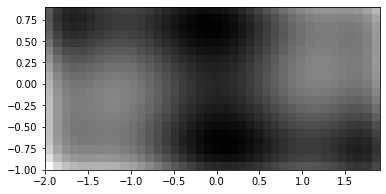

In [6]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from scipy import optimize

def f(params):
    x,y=params
    return (4-2.1*x**2+ x**4/3)*x**2 +x*y + (4*y**2-4)*y**2

x = np.arange(-2,2,0.1)
y = np.arange(-1,1,0.1)


xx, yy = np.meshgrid(x,y)

z = f([xx,yy])
extent = np.min(x), np.max(x), np.min(y), np.max(y)


pylab.figure()
pylab.imshow(z, interpolation='nearest',origin="lower",extent=extent,cmap='gray')
print(z.shape)


starting_points =[[0,0],[-0.1,0.5],[0.1,-0.5]]

result = [optimize.basinhopping(f, sp, stepsize=0.5, niter=200) for sp in starting_points]
# summarize the result
for r,sp in zip(result,starting_points):
    print("\nSolution with starting point = ",sp)
    print('Status : %s' % r['message'])
    print('Total Evaluations: %d' % r['nfev'])
    # evaluate solution
    solution = r['x']
    evaluation = f(solution)
    print('Solution: f(%s) = %.5f' % (solution, evaluation))

There are two global minima at approximately (-0.08984202, 0.7126564) and (0.08984201, -0.7126564). The function at these points is approximately -1.03163 for both points. 
If we try to start from origin there is a wrong solution which is (0,0). We can tell it is wrong by watching the picture of the function.
If we use the starting point (0,0) we find the solution (-0.08984202, 0.7126564)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

[23.09207141  5.73581557  2.29443164 15.77934501]
[ 52.64929244   6.16452594   1.97590023 -61.32093749]


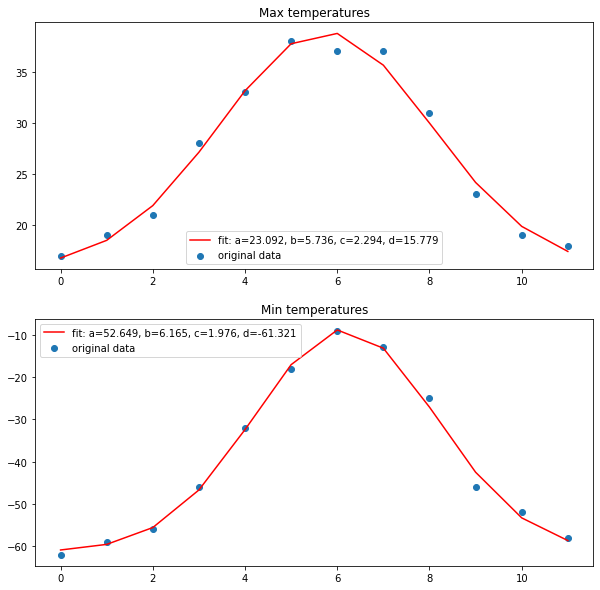

In [59]:
max_T = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_T = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

#functions to describe data
def f_gauss(x, a, x0, sigma, d): #gaussian function
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + d

m=12
X_train = np.arange(m)
Y_train_max_T = np.array(max_T)

mean = sum(X_train * Y_train_max_T)/sum(Y_train_max_T)
sigma = np.sqrt(sum(Y_train_max_T * (X_train - mean)**2) / sum(Y_train_max_T))

popt, pcov = optimize.curve_fit(f_gauss, X_train, Y_train_max_T, p0 = [max(Y_train_max_T), mean, sigma, 0])
print(popt)

fig, (ax_max, ax_min) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax_max.set_title("Max temperatures")
ax_max.scatter(X_train,max_T,label="original data")
ax_max.plot(X_train, f_gauss(X_train, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
ax_max.legend()

###MIN TEMPERATURES
Y_train_min_T = np.array(min_T)

mean = sum(X_train * Y_train_min_T)/sum(Y_train_min_T)
sigma = np.sqrt(sum(Y_train_min_T * (X_train - mean)**2) / sum(Y_train_min_T))

popt, pcov = optimize.curve_fit(f_gauss, X_train, Y_train_min_T, p0 = [max(Y_train_min_T), mean, sigma, 0], maxfev=50000)
print(popt)

ax_min.set_title("Min temperatures")
ax_min.scatter(X_train,min_T,label="original data")
ax_min.plot(X_train, f_gauss(X_train, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
ax_min.legend()



3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

optimal parameters found: a=2748.283, b(mean)=-0.088, c(std)=0.234, d=27.481


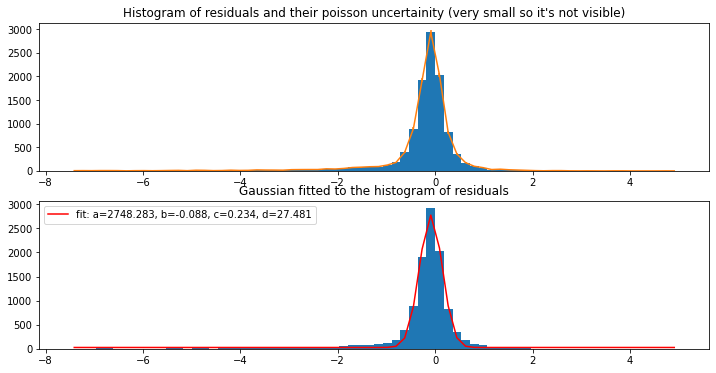

In [101]:
import pickle
from pandas import DataFrame
from scipy import stats
import seaborn as sns

filename = "data/residuals_261.pkl"

with open(filename, 'rb') as f:
    data = pickle.load(f)

df = DataFrame(data.item(0)) #need to applyy item(0) to get the data loading into a dataframe

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

ax1.set_title("Histogram of residuals and their poisson uncertainity (very small so it's not visible)")
h, bins, _ = ax1.hist(df['residuals'], bins=70, range = (-7.5,5)) # create and plot the histogram

bin_centres = (bins[:-1] + bins[1:])/2. #bin centres
err_poiss = np.sqrt(h) #poisson uncertainity
ax1.errorbar(x = bin_centres, y = h, yerr=err_poiss) #error bar (in the graph is not very visible because is very short)

#The graph seems to be a gaussian distribution, so let's fit it with that function
xmin,xmax = plt.xlim()

Y = h
X = bin_centres
mean, sigma = stats.norm.fit(Y) #calculate mean and sigma of the gaussian
popt, pcov = optimize.curve_fit(f_gauss, X, Y, p0 = [max(Y), mean, sigma, 0])
print("optimal parameters found: a=%5.3f, b(mean)=%5.3f, c(std)=%5.3f, d=%5.3f" % tuple(popt))

ax2.set_title("Gaussian fitted to the histogram of residuals")
ax2.hist(df['residuals'], bins=70, range = (-7.5,5)) # create and plot the histogram
#ax2.scatter(X,Y,label="original data")
ax2.plot(X, f_gauss(X, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(popt))
ax2.legend()


###TODO: GOODNESS OF FITA


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.